Brazilian Flights Network Analysis

Authors: [Brenda Alexandra de Souza Silva](https://github.com/breudes) and [Paulo Vanzolini Moura da Silva](https://github.com/paulovanzo) 

To use the code below, make sure you execute these first two cells, to install and download necessary packages and files

In [ ]:
# import nxvix package
!pip install nxviz==0.6.3 matplotlib==3.3.3
!wget --no-check-certificate "https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/airports.csv"
!curl --output anac.zip https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/anac.zip
!apt install unzip
!unzip anac.zip

     |████████████████████████████████| 11.6 MB 6.2 MB/s 
     |████████████████████████████████| 11.3 MB 48.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


--2021-12-06 21:59:40--  https://raw.githubusercontent.com/alvarofpp/dataset-flights-brazil/main/data/airports.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87638 (86K) [text/plain]
Saving to: ‘airports.csv’

airports.csv        100%[===================>]  85.58K  --.-KB/s    in 0.01s   

2021-12-06 21:59:40 (8.71 MB/s) - ‘airports.csv’ saved [87638/87638]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35.5M  100 35.5M    0     0  15.7M      0  0:00:02  0:00:02 --:--:-- 15.7M
Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 

In [ ]:
# other imports
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
from nxviz import CircosPlot 
import pandas as pd
import numpy as np
#from nxviz import annotate

# Run this code to add the attribute region to the graph in the graphml file.

In [ ]:
!pip install pandas==1.3.0

import pandas as pd
df_airports = pd.read_csv('airports.csv')
df_flights = pd.read_csv('anac.csv')


# Create graph
G = nx.Graph()

# Add nodes
for index, row in df_airports.iterrows():
    G.add_node(row['code'],
               name=row['name'],
               country=row['country'],
               latitude=row['lat_geo_point'],
               longitude=row['lon_geo_point'],
               region=row['region']
               )

# Add edges
df_edges = df_flights[[
    'origin_airport_abbreviation',
    'destination_airport_abbreviation',
]].dropna()

df_edges = df_edges.groupby(df_edges.columns.tolist(), as_index=False).size()
for index, row in df_edges.iterrows():
    if row['origin_airport_abbreviation'] == row['destination_airport_abbreviation']:
        continue
    G.add_edge(row['origin_airport_abbreviation'], row['destination_airport_abbreviation'], flight_count=row['size'])

# Export to graphml
nx.write_graphml(G, 'air_traffic.graphml')

***Requirement 1***

Take notice about the network assortativity considering the region of the airport

Degree assortativity: -0.2022151039385204


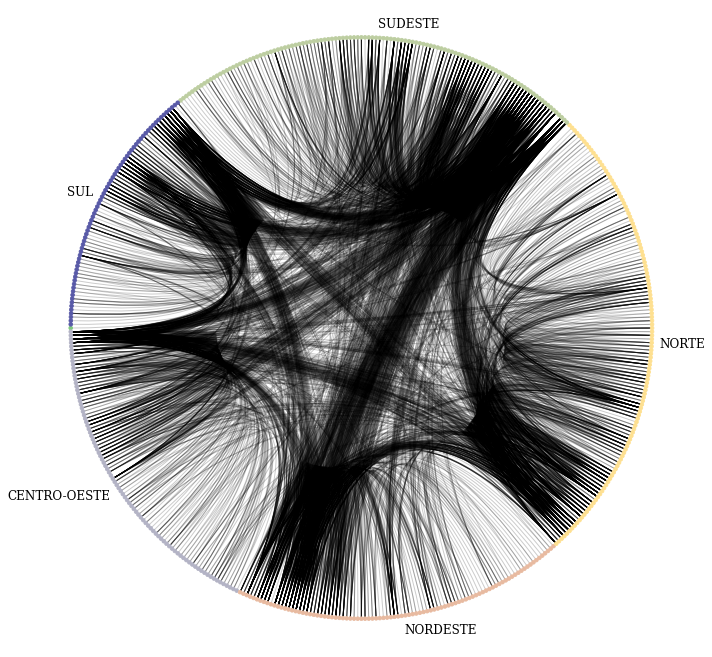

In [ ]:
airports = pd.read_csv("airports.csv")
graph = nx.read_graphml("air_traffic.graphml")

list_rm = []
for i in range(len(airports['region'])):
  if type(airports['region'][i]) == type(float(0)) or airports['region'][i]=="NÃO IDENTIFICADO":
    list_rm.append(list(airports['code'])[i])

graph.remove_node("nan")
graph.remove_nodes_from(list_rm)
attr_regions={}

for k in graph.nodes:
  for j in range(len(airports["code"])):
    if k == airports["code"][j]:
      if type(airports["region"][j]) == type(str(0)):
        attr_regions.update({airports["code"][j]:airports["region"][j]})

c = CircosPlot(graph, node_color='region', 
               node_grouping='region',
               node_order="region",
               node_labels=False,
               group_label_position="middle",
               group_label_color=False,
               figsize = (10,10),
               nodeprops={"radius": 0.5},
               fontsize=12
               )

# Draw c to the screen
c.draw()
c.figure.tight_layout()

# Requirement 1 - part 1 of 2: Display degree assortativity 
print("Degree assortativity: " + str(nx.degree_assortativity_coefficient(graph)))

# Requirement 1 - part 2 of 2: Display the plot of brazillian aeroports by region
plt.show()


As the degree of assortativity is negative, the network is not assortative, which means, nodes with greater connectivity connect with nodes with lesser connectivity.

**Requirement 2**


Do a bivariate analysis between the mean of neighbors and the degree of nodes

BRAZIL FLIGHTS
Coefficient: -0.2368463764556992


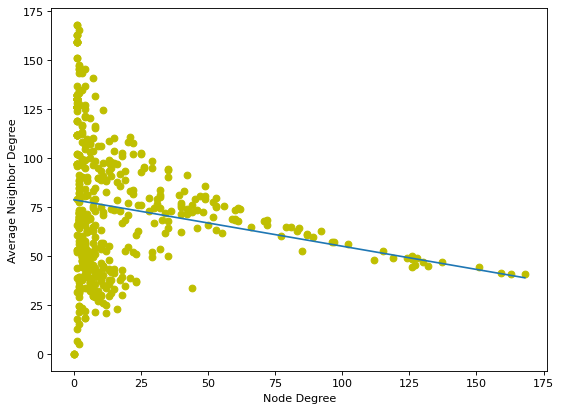

 
Region NORDESTE
Coefficient of regression: -0.2072324196507064


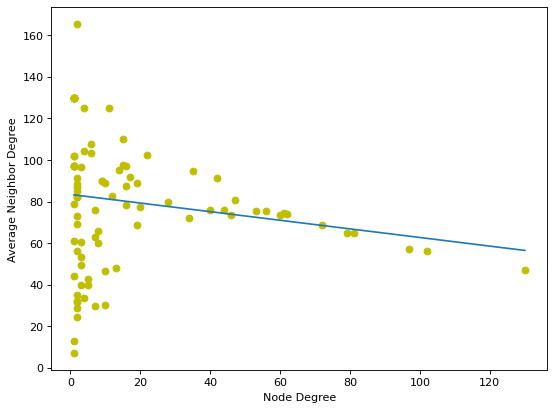

Region SUL
Coefficient of regression: -0.41821909182900463


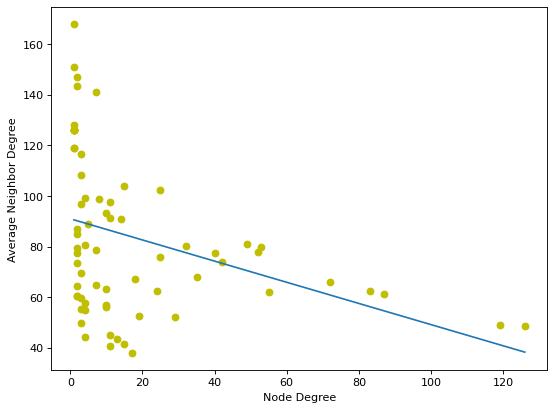

Region CENTRO-OESTE
Coefficient of regression: -0.17262646178281518


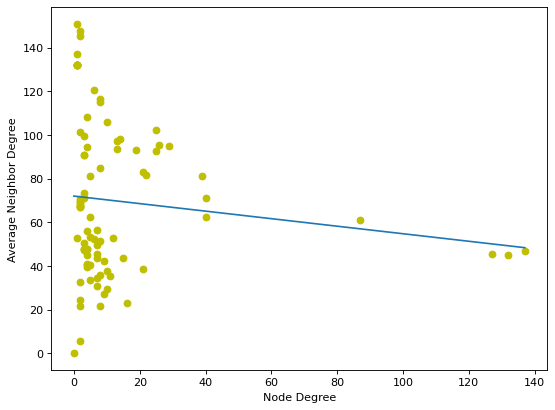

Region NORTE
Coefficient of regression: -0.02004407747541611


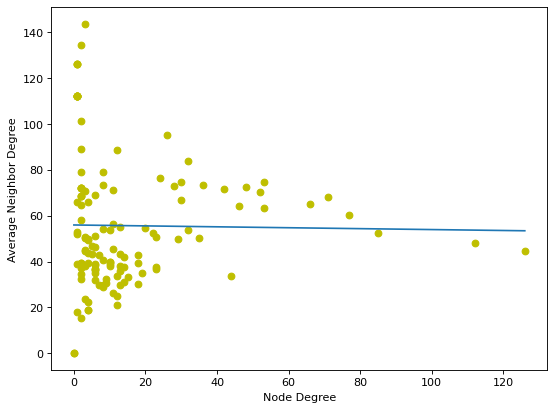

Region SUDESTE
Coefficient of regression: -0.42206350766611467


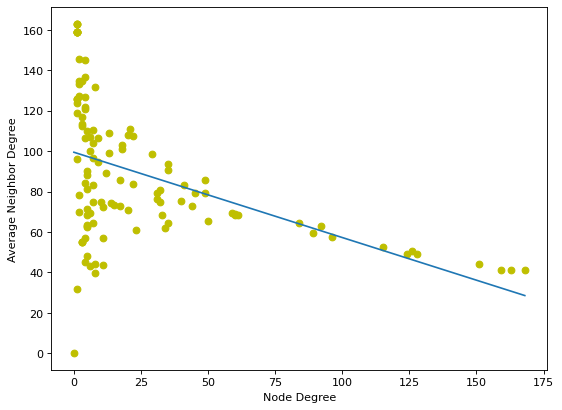

In [38]:
graph = nx.read_graphml("air_traffic.graphml")

list_neighbors = []
list_degree = []
list_confere=[]

list_rm = []
for i in range(len(airports['region'])):
  if type(airports['region'][i]) == type(float(0)) or airports['region'][i]=="NÃO IDENTIFICADO":
    list_rm.append(list(airports['code'])[i])

graph.remove_node("nan")
graph.remove_nodes_from(list_rm)

neighbor = nx.average_neighbor_degree(graph)

for sg_graph in neighbor:
  list_neighbors.append(neighbor[sg_graph])
  list_confere.append(sg_graph)

# Only appends if the code matches and it appends in the same order of nodes
for i in range(len(list_confere)):
  for sg_graph, degree in graph.degree:
    if list_confere[i] == sg_graph:
      list_degree.append(degree)

# Sort by Average neighbor degree, but keeping node indexed correctly
for i in range(len(list_degree)):
  for j in range(len(list_degree)):
    if list_degree[i] > list_degree[j]:
      aux=list_neighbors[i]
      list_neighbors[i]=list_neighbors[j]
      list_neighbors[j]=aux
      aux=list_degree[i]
      list_degree[i]=list_degree[j]
      list_degree[j]=aux

plt.figure(figsize=(8, 6), dpi=80)
print("BRAZIL FLIGHTS")
m,b = np.polyfit(list_degree, list_neighbors, 1)
print("Coefficient:",m)
plt.xlabel("Node Degree")
plt.ylabel("Average Neighbor Degree")
plt.plot(list_degree, list_neighbors,'yo')
plt.plot(list_degree, m*np.array(list_degree)+b)
plt.draw()
plt.show()

region=nx.get_node_attributes(graph,"region")

labels = {"NORDESTE":[],"SUL":[],"CENTRO-OESTE":[],"NORTE":[],"SUDESTE":[],}

for j in range(len(list(region))):
  if region[list(region)[j]] == "NORDESTE":
    labels["NORDESTE"].append(list(region)[j])
  elif region[list(region)[j]] == "NORTE":
    labels["NORTE"].append(list(region)[j])
  elif region[list(region)[j]] == "CENTRO-OESTE":
    labels["CENTRO-OESTE"].append(list(region)[j])
  elif region[list(region)[j]] == "SUDESTE":
    labels["SUDESTE"].append(list(region)[j])
  elif region[list(region)[j]] == "SUL":
    labels["SUL"].append(list(region)[j])
  else:
    print(region[list(region)[j]])


for i in labels:
  list_degree = []
  print("Region",i)
  neighbor = list(pd.Series(nx.average_neighbor_degree(graph))[labels[i]])
  
  # Only appends if the code matches and it appends in the same order of nodes
  for j in range(len(labels[i])):
    for sg_graph, degree in graph.degree:
      if list(labels[i])[j] == sg_graph:
        list_degree.append(degree)

  # Sort by Average neighbor degree, but keeping node indexed correctly
  for k in range(len(neighbor)):
    for j in range(len(neighbor)):
      if list(list_degree)[k] > list(list_degree)[j]:
        aux=neighbor[k]
        neighbor[k]=neighbor[j]
        neighbor[j]=aux
        aux=list_degree[k]
        list_degree[k]=list_degree[j]
        list_degree[j]=aux

  plt.figure(figsize=(8, 6), dpi=80)
  m,b = np.polyfit(list_degree, neighbor, 1) 
  print("Coefficient of regression:",m)
  plt.xlabel("Node Degree")
  plt.ylabel("Average Neighbor Degree")
  plt.plot(list_degree, neighbor,'yo')
  plt.plot(list_degree, m*np.array(list_degree)+b)
  plt.draw()
  plt.show()


Therefore, we can see that the graphics look quite the same, the biggest differences goes to SOUTHEAST(SUDESTE) and SOUTH(SUL), as their airports has a coefficient of regression more negative than the others. Which means that more degree an airport in those two region has, fewer are their neighbor's degree.

***Requirement 3***

How many connected components exists in the brazilian air traffic? Characterize each component: quantity, percentage by region



There are 5 connected components
Component 0 has 492 nodes
Percentages of Component 0 per region
Percentage of airports in NORDESTE: 18.73727087576375%
Percentage of airports in NORTE: 25.661914460285136%
Percentage of airports in CENTRO-OESTE: 17.922606924643585%
Percentage of airports in SUDESTE: 23.421588594704684%
Percentage of airports in SUL: 14.25661914460285%
Component 1 has only one node
Component 2 has only one node
Component 3 has only one node
Component 4 has only one node


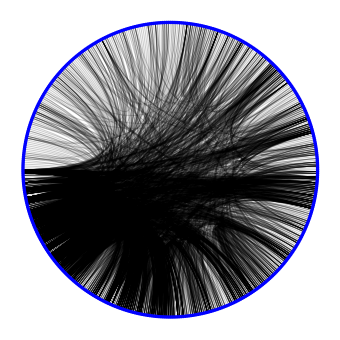

In [ ]:
print("There are " + str(len(list(nx.connected_components(graph)))) + " connected components")
list_rm = []

for i in range(len(list(nx.connected_components(graph)))):
  if len(list(nx.connected_components(graph))[i]) > 1:
    subgraph=nx.subgraph(graph,list(list(nx.connected_components(graph))[i]))
    print("Component " + str(i) + " has " + str(len(list(nx.connected_components(graph))[i])) + " nodes")

    attr_regions={}

    for k in subgraph.nodes:
      for j in range(len(airports["code"])):
        if k == airports["code"][j]:
          if type(airports["region"][j]) == type(str(0)):
            attr_regions.update({airports["code"][j]:airports["region"][j]})

    labels = {"NORDESTE":[],"SUL":[],"CENTRO-OESTE":[],"NORTE":[],"SUDESTE":[]}

    for j in range(len(list(attr_regions))):
      if attr_regions[list(attr_regions)[j]] == "NORDESTE":
        labels["NORDESTE"].append(i)
      if attr_regions[list(attr_regions)[j]] == "NORTE":
        labels["NORTE"].append(i)
      if attr_regions[list(attr_regions)[j]] == "CENTRO-OESTE":
        labels["CENTRO-OESTE"].append(i)
      if attr_regions[list(attr_regions)[j]] == "SUDESTE":
        labels["SUDESTE"].append(i)
      if attr_regions[list(attr_regions)[j]] == "SUL":
        labels["SUL"].append(i)

    print("Percentages of Component " + str(i) + " per region")
    print("Percentage of airports in NORDESTE: " + str(len(labels["NORDESTE"])/(len(labels["SUL"])+len(labels["NORTE"])+len(labels["NORDESTE"])+len(labels["CENTRO-OESTE"])+len(labels["SUDESTE"]))*100)+"%")
    print("Percentage of airports in NORTE: " + str(len(labels["NORTE"])/(len(labels["SUL"])+len(labels["NORTE"])+len(labels["NORDESTE"])+len(labels["CENTRO-OESTE"])+len(labels["SUDESTE"]))*100)+"%")
    print("Percentage of airports in CENTRO-OESTE: " + str(len(labels["CENTRO-OESTE"])/(len(labels["SUL"])+len(labels["NORTE"])+len(labels["NORDESTE"])+len(labels["CENTRO-OESTE"])+len(labels["SUDESTE"]))*100)+"%")
    print("Percentage of airports in SUDESTE: " + str(len(labels["SUDESTE"])/(len(labels["SUL"])+len(labels["NORTE"])+len(labels["NORDESTE"])+len(labels["CENTRO-OESTE"])+len(labels["SUDESTE"]))*100)+"%")
    print("Percentage of airports in SUL: " + str(len(labels["SUL"])/(len(labels["SUL"])+len(labels["NORTE"])+len(labels["NORDESTE"])+len(labels["CENTRO-OESTE"])+len(labels["SUDESTE"]))*100)+"%")

    vis_graph=CircosPlot(subgraph)
    vis_graph.draw()
  else:
    print("Component " + str(i) + " has only one node" )


***Requirement 4***

Create a simulated scenario where you want to make a
trip with the following route:


*   city 1 (North) to city 2 (South)
*   city 2 (South) to city 3 (Northeast)
*   city 3 (Northeast) to city 4 (Midwest)
*   city 4 (Midwest) to city 5 (Southeast)

Using the concept of the shortest path, describe the path taken and the number of paths taken.

List of paths
Path one:  ['SBBV', 'SBGR', 'SSUM']
Path two:  ['SSUM', 'SBGR', 'SBCV']
Path three:  ['SBCV', 'SBGL', 'SBBR']
Path four:  ['SBBR', 'SBCF']

All cities linked by four paths (described previously) you can see on this graph: 


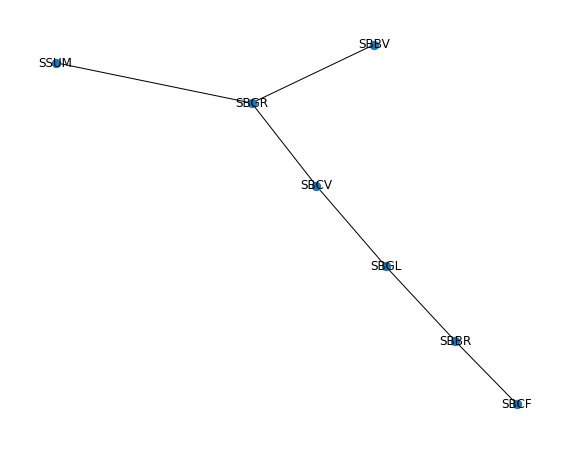

In [ ]:
# get first city of one region founded on graph

# north city
nodes_north_region = [x for x,y in graph.nodes(data=True) if y['region']=="NORTE"]
city_north = nodes_north_region[0]
# south city
nodes_south_region = [x for x,y in graph.nodes(data=True) if y['region']=="SUL"]
city_south = nodes_south_region[0]
# northeast city
nodes_northeast_region = [x for x,y in graph.nodes(data=True) if y['region']=="NORDESTE"]
city_northeast = nodes_northeast_region[0]
# midwest
nodes_midwest_region = [x for x,y in graph.nodes(data=True) if y['region']=="CENTRO-OESTE"]
city_midwest = nodes_midwest_region[0]
# southeast city
nodes_southeast_region = [x for x,y in graph.nodes(data=True) if y['region']=="SUDESTE"]
city_southeast = nodes_southeast_region[0]

# get all cities combined
count = 0
def get_paths_nodes(list_path, path):
  for i in path:
    list_path.append(i)

list_paths = []

cities_paths_quantity = 0

path_one = nx.shortest_path(graph, city_north, city_south)
path_two = nx.shortest_path(graph, city_south, city_northeast)
path_three = nx.shortest_path(graph, city_northeast, city_midwest)
path_four = nx.shortest_path(graph, city_midwest, city_southeast)

get_paths_nodes(list_paths,path_one)
get_paths_nodes(list_paths,path_two)
get_paths_nodes(list_paths,path_three)
get_paths_nodes(list_paths,path_four)

print("List of paths")
print("Path one: ",path_one)
print("Path two: ",path_two)
print("Path three: ",path_three)
print("Path four: ",path_four)

list_path = []

for index,city in enumerate(list_paths):
  if( index+1 < len(list_paths) ):
    tuple_path = (city, list_paths[index+1])
    list_path.append(tuple_path)

print("\nAll cities linked by four paths (described previously) you can see on this graph: ")
G = nx.Graph()
G.add_edges_from(list_path)
G.remove_edges_from(nx.selfloop_edges(G))

fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(G, ax=ax,node_size=70, with_labels=True)
plt.axis("off")
plt.show()




As you can see, about of eight cities were involved on these path, and seven paths were viewed after sum of all trajectories. In those seven paths, one city was visited twice, its has code equals SBGR (highlighted on graph). 

This was possible considering the concept of shortest path found between two nodes on the original graph.

***Requirement 5***

Conduct a study on the Clustering Coefficient considering the
National Air Mesh Network, as well as the aerial subnets of
each Region (North, Northeast, Midwest, South and Southeast)

BRAZIL FLIGHTS
Transitivity: 0.3955800778944884
Average clustering: 0.6319194649851667


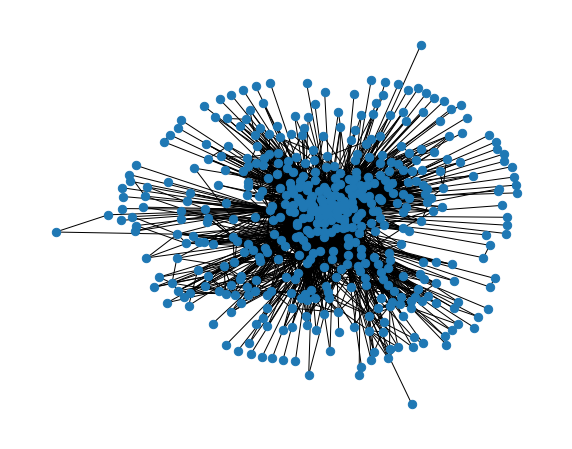

In [ ]:
print("BRAZIL FLIGHTS")
print("Transitivity: " + str(nx.transitivity(graph)))
print("Average clustering: " + str(nx.average_clustering(graph)))

for j in graph.nodes:
    if(len(nx.edges(graph, j)) == 0):
      graph.remove_node(j)

fig, ax = plt.subplots(1, 1,figsize=(10,8))
nx.draw_networkx(graph, ax=ax,node_size=70, with_labels=False)
plt.axis("off")
plt.show()

 
Region NORDESTE
Transitivity: 0.4409030544488712
Average clustering: 0.463250501894564


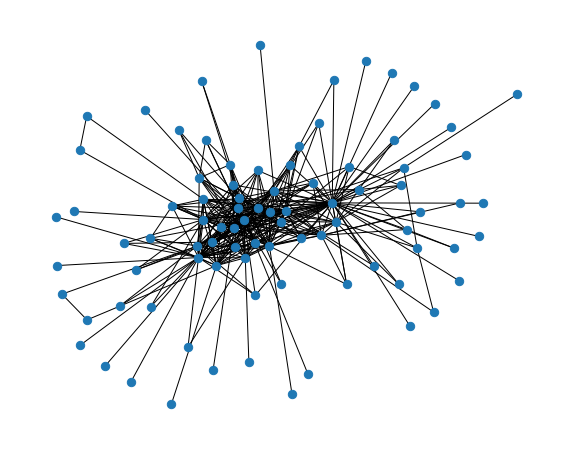

Region SUL
Transitivity: 0.45136387030365416
Average clustering: 0.6439371850570685


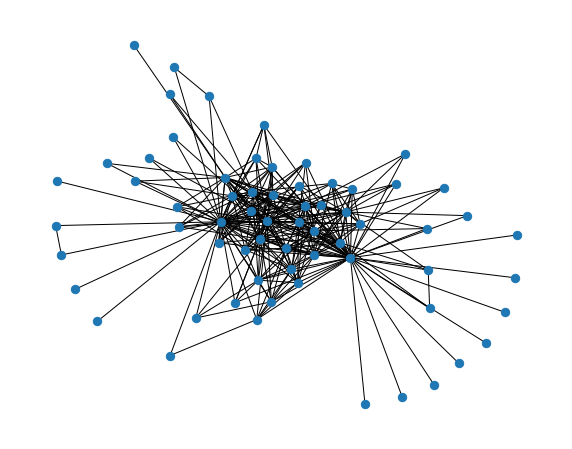

Region CENTRO-OESTE
Transitivity: 0.22888283378746593
Average clustering: 0.6024948673958387


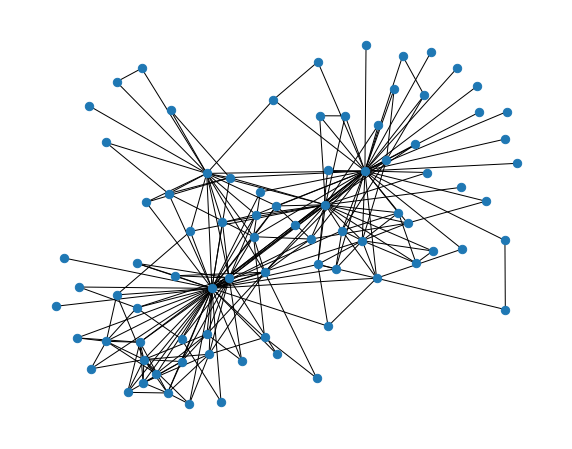

Region NORTE
Transitivity: 0.37144938091769847
Average clustering: 0.6358351678817795


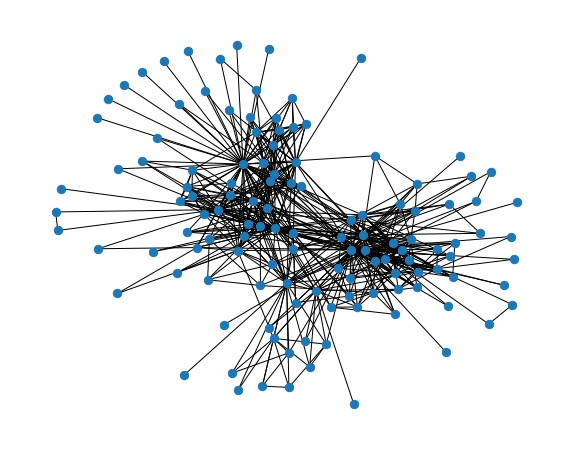

Region SUDESTE
Transitivity: 0.4499554121194106
Average clustering: 0.6465380743218339


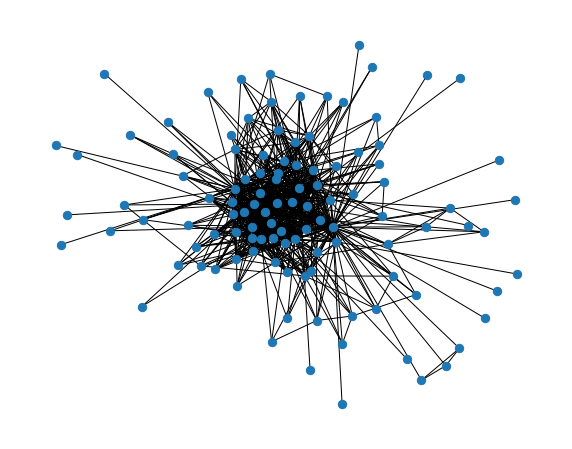

In [ ]:
region=nx.get_node_attributes(graph,"region")

labels = {"NORDESTE":[],"SUL":[],"CENTRO-OESTE":[],"NORTE":[],"SUDESTE":[],}

for j in range(len(list(region))):
  if region[list(region)[j]] == "NORDESTE":
    labels["NORDESTE"].append(list(region)[j])
  elif region[list(region)[j]] == "NORTE":
    labels["NORTE"].append(list(region)[j])
  elif region[list(region)[j]] == "CENTRO-OESTE":
    labels["CENTRO-OESTE"].append(list(region)[j])
  elif region[list(region)[j]] == "SUDESTE":
    labels["SUDESTE"].append(list(region)[j])
  elif region[list(region)[j]] == "SUL":
    labels["SUL"].append(list(region)[j])
  else:
    print(region[list(region)[j]])

for i in labels:
  subgraph = nx.subgraph(graph,labels[i])
  print("Region",i)
  print("Transitivity: " + str(nx.transitivity(subgraph)))
  print("Average clustering: " + str(nx.average_clustering(subgraph)))

  for j in subgraph.nodes:
    if(len(nx.edges(subgraph, j)) == 0):
      graph.remove_node(j)

  fig, ax = plt.subplots(1, 1,figsize=(10,8))
  nx.draw_networkx(subgraph, ax=ax,node_size=70, with_labels=False)
  plt.axis("off")
  plt.show()